<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Names" data-toc-modified-id="Names-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Names</a></span><ul class="toc-item"><li><span><a href="#Restrict-notebooks" data-toc-modified-id="Restrict-notebooks-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Restrict notebooks</a></span></li><li><span><a href="#Count-once-by-notebook" data-toc-modified-id="Count-once-by-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Count once by notebook</a></span></li><li><span><a href="#Count-all-uses-across-all-notebooks" data-toc-modified-id="Count-all-uses-across-all-notebooks-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Count all uses across all notebooks</a></span></li></ul></li><li><span><a href="#Others" data-toc-modified-id="Others-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Others</a></span></li></ul></div>

# Names

Analyze variable names

In [1]:
import sys

sys.path.insert(0, "../archaeology")
sys.path.insert(0, "../analysis")
from collections import Counter
from IPython.display import display

import pandas as pd
import numpy as np

from db import connect
from analysis_helpers import display_counts, calculate_auto

%matplotlib inline

In [2]:
%%time
with connect() as session:
    # print('Last query:', session.query(Query).all()[-1])
    raw_names = pd.read_sql_table("notebook_names", session.connection())
    print("Notebook Names:", len(raw_names))

Notebook Names: 5493
CPU times: user 1.21 s, sys: 104 ms, total: 1.32 s
Wall time: 1.31 s


In [3]:
# prefix = ["any", "nonlocal", "local", "class", "global", "main"]
# suffix = ["any", "class", "import", "importfrom", "function", "param", "del", "load", "store"]
prefix = ["any"]
suffix = ["any"]

for p in prefix:
    for s in suffix:
        column = "{}_{}".format(p, s)
        print(column)
        raw_names[column + "_dict"] = raw_names.apply(
            (
                lambda r: {
                    k: int(v)
                    for k, v in zip(
                        r[column].split(","), r[column + "_counts"].split(",")
                    )
                    if k
                    if int(v)
                }
            ),
            axis=1,
        )
        raw_names[column + "_count"] = raw_names[column + "_dict"].apply(
            lambda x: sum(x.values())
        )
        raw_names[column + "_count_unique"] = raw_names[column + "_dict"].apply(
            lambda x: sum(1 for _ in x)
        )

any_any


In [4]:
raw_names.head(5)

,id,repository_id,notebook_id,index,index_count,any_any,any_any_counts,any_class,any_class_counts,any_import,...,main_del_counts,main_load,main_load_counts,main_store,main_store_counts,others,skip,any_any_dict,any_any_count,any_any_count_unique
0,1,7,9,"0,1,2",3,"plt,lengths,newlist,nElem,print,int,n50,stats,...","8,8,6,5,5,4,4,3,3,3,3,3,2,2,2,2,2,2,2,1,1,1,1",,,"plt,sys,stats",...,,"lengths,plt,print,int,newlist,nElem,len,avg,st...","7,7,5,4,4,4,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1","n50,newlist,fname,lengths,hFile,line,avg,med,s...","3,2,1,1,1,1,1,1,1,1,1,1,1,1",,0,"{'plt': 8, 'lengths': 8, 'newlist': 6, 'nElem'...",73,23
1,2,7,10,"0,1,2,3,4,5,7",7,"int,locus,coord_lims,plt,targetStart,targetEnd...","45,28,21,19,13,13,12,10,8,7,7,7,7,6,6,6,6,6,6,...",,,"sys,re,plt,stats,matplotlib",...,,"int,locus,coord_lims,plt,axs,targetStart,targe...","45,27,20,18,11,10,10,6,6,5,5,5,5,5,5,4,4,4,4,3...","line,rest,_,hFile,targetLen,targetStart,target...","4,4,4,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,...",,0,"{'int': 45, 'locus': 28, 'coord_lims': 21, 'pl...",351,59
2,3,7,11,"0,1,2,3,4,5,6,7",8,"readID,reads,array,print,stack,intervals,i,rc,...","20,18,13,11,9,8,8,8,7,7,7,6,6,6,5,5,5,4,4,4,4,...",Solution,1,"plt,sys,re,statistics",...,,"reads,readID,print,int,cov_data,nr_regions,reg...","17,16,11,5,5,4,4,4,3,2,2,2,2,2,2,2,2,1,1,1,1,1...","readID,rc,nLines,ob1,nr_regions,reg,strPAF_in,...","4,4,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",,0,"{'readID': 20, 'reads': 18, 'array': 13, 'prin...",216,51
3,4,7,12,"0,1,2,3,4,5,6,7,8",9,"plt,print,r,locs,dat,len,bins,repeats,math,reg...","16,14,14,12,9,9,9,9,9,9,9,8,8,7,7,6,6,6,5,5,5,...",,,"plt,stats,sys,pickle,functools,math,np,pd",...,,"plt,print,r,len,bins,math,locs,dat,nBinSize,re...","15,14,12,9,8,8,8,7,7,7,7,7,6,6,6,5,5,5,4,4,3,3...","locs,reg_start,dat,hFile,iBin,iPos,repeats,_,x...","4,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,...",,0,"{'plt': 16, 'print': 14, 'r': 14, 'locs': 12, ...",294,68
4,5,7,13,"0,1,2,5,6,7,8,9,10,11",10,"plt,data_y,v,data_x,int,ylab_new,x,y,kmers,dat...","51,17,12,11,10,10,9,9,9,9,8,8,8,8,8,8,7,6,6,5,...",,,"plt,math,stat,statistics",...,,"plt,data_y,int,v,data_x,print,ylab_new,data,km...","48,14,10,10,8,8,8,8,7,6,6,6,5,5,4,4,4,4,4,4,3,...","hFile,line,x,y,i,data_x,data_y,sum,kmers,k,ylo...","4,4,4,4,4,3,3,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,...",,0,"{'plt': 51, 'data_y': 17, 'v': 12, 'data_x': 1...",273,43


## Restrict notebooks

In [5]:
SKIP_MAP = {
    "f_": 1024 + 512,
    "d_": 1024 + 512 + 128,
    "dt_": 1024 + 512 + 128 + 32,
    "dr_": 1024 + 512 + 128 + 64,
}

CONFIG = {
    "Default": "f_",
    "Remove duplicates": "d_",
    "Remove duplicates and toy": "dt_",
    "Remove duplicates and restricted toy": "dr_",
}

In [6]:
@calculate_auto(CONFIG, save_to="names", level=None)
def func(prefix=""):
    return raw_names[np.bitwise_and(raw_names["skip"], SKIP_MAP[prefix]) == 0]

## Count once by notebook

### Default

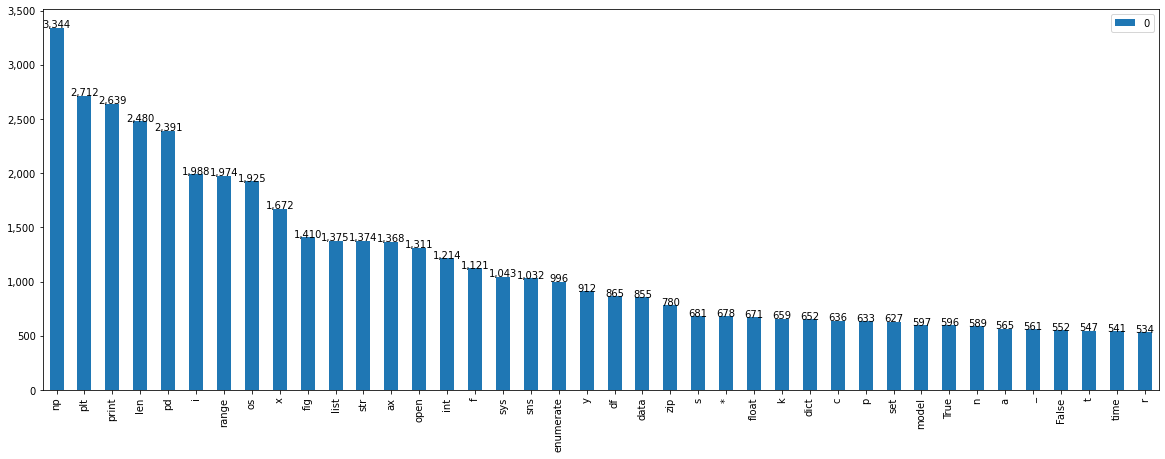

,0
np,3344
plt,2712
print,2639
len,2480
pd,2391
i,1988
range,1974
os,1925
x,1672
fig,1410


### Remove duplicates

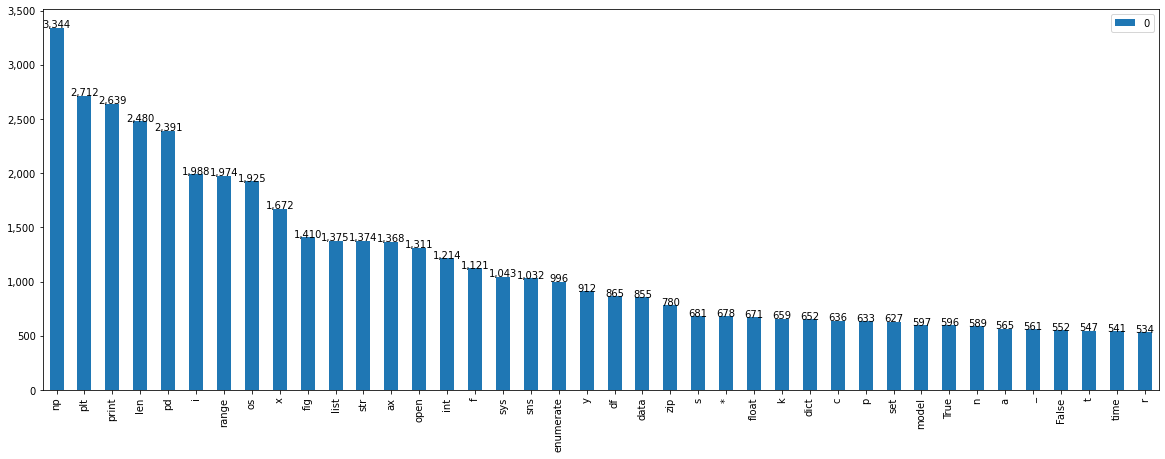

,0
np,3344
plt,2712
print,2639
len,2480
pd,2391
i,1988
range,1974
os,1925
x,1672
fig,1410


### Remove duplicates and toy

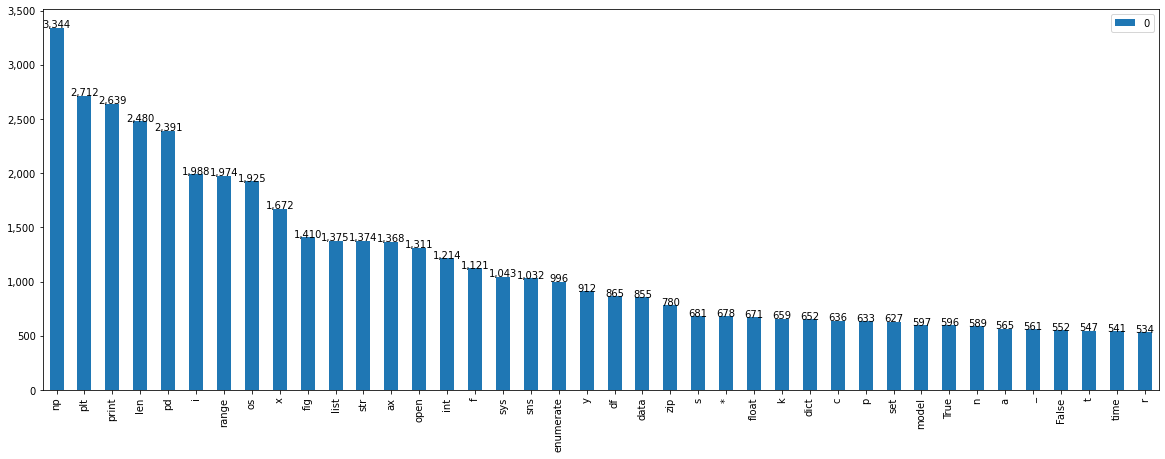

,0
np,3344
plt,2712
print,2639
len,2480
pd,2391
i,1988
range,1974
os,1925
x,1672
fig,1410


### Remove duplicates and restricted toy

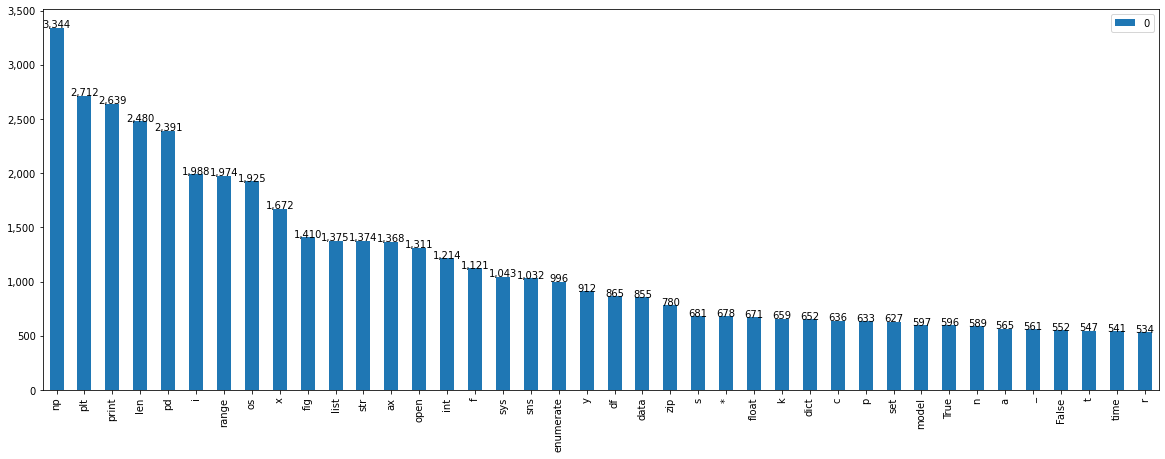

,0
np,3344
plt,2712
print,2639
len,2480
pd,2391
i,1988
range,1974
os,1925
x,1672
fig,1410


In [7]:
@calculate_auto(CONFIG)
def fn(names, prefix):
    counter = Counter()
    names["any_any_dict"].apply(lambda x: counter.update(x.keys()))
    counts = pd.Series(counter).sort_values(ascending=False)
    display_counts(counts, show_values=True, logy=False, cut=slice(None, 40))

## Count all uses across all notebooks


### Default

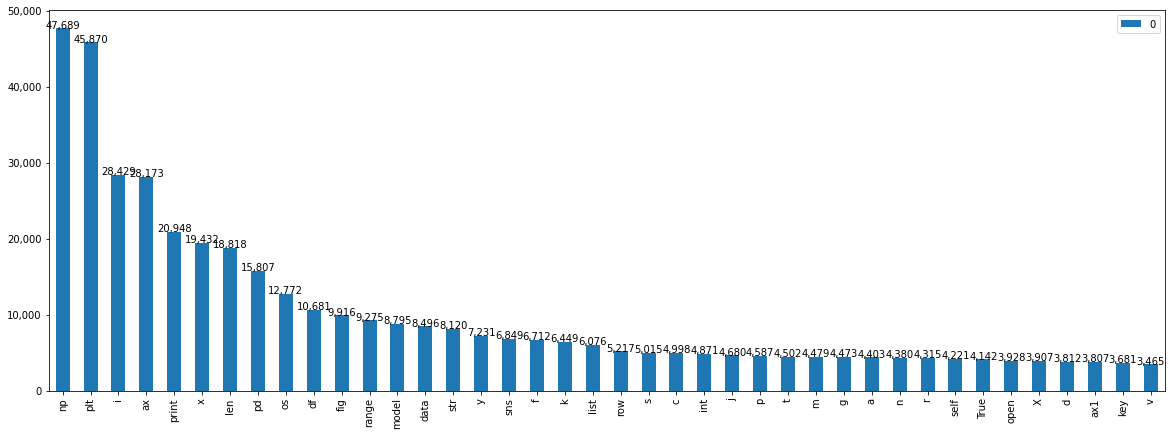

,0
np,47689
plt,45870
i,28429
ax,28173
print,20948
x,19432
len,18818
pd,15807
os,12772
df,10681


### Remove duplicates

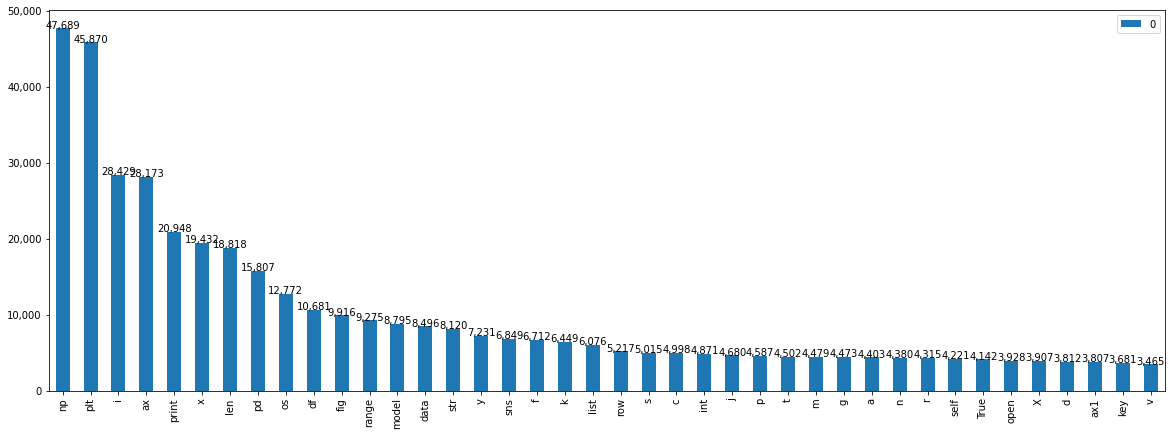

,0
np,47689
plt,45870
i,28429
ax,28173
print,20948
x,19432
len,18818
pd,15807
os,12772
df,10681


### Remove duplicates and toy

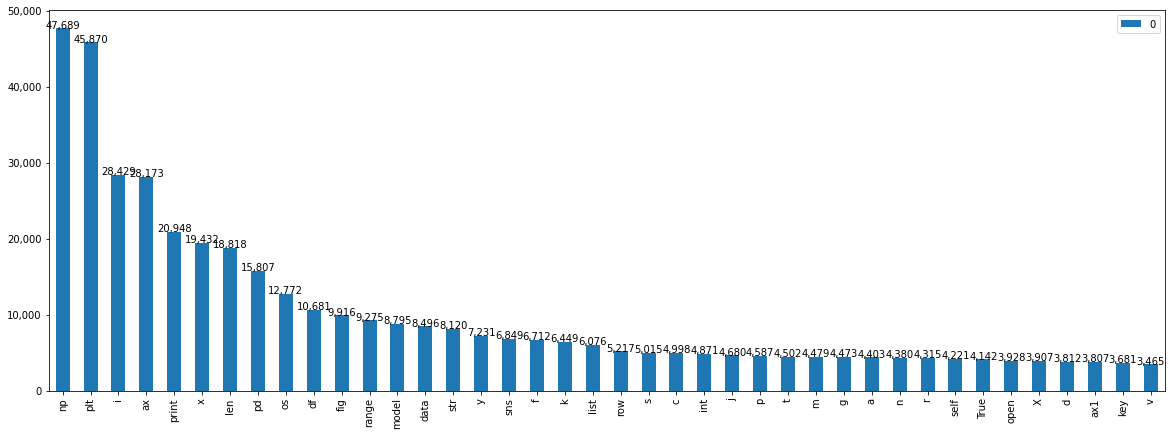

,0
np,47689
plt,45870
i,28429
ax,28173
print,20948
x,19432
len,18818
pd,15807
os,12772
df,10681


### Remove duplicates and restricted toy

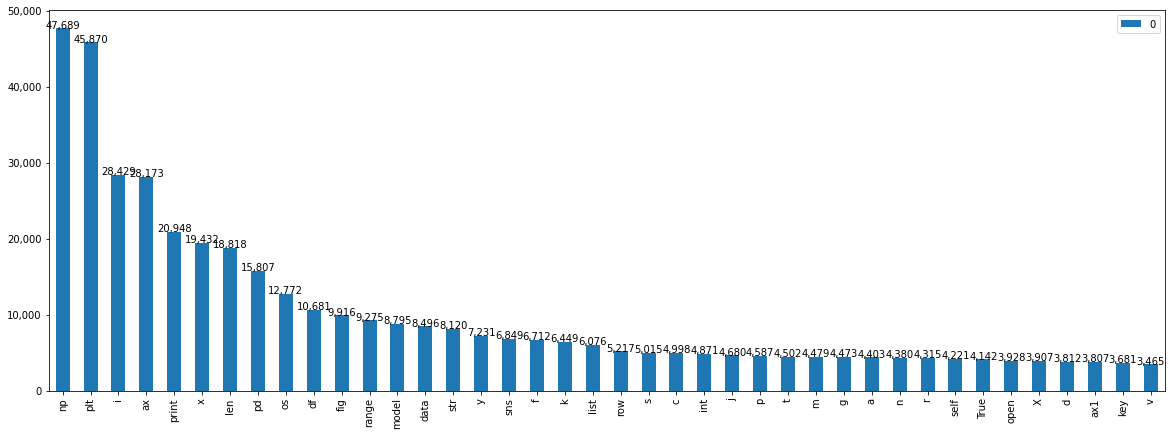

,0
np,47689
plt,45870
i,28429
ax,28173
print,20948
x,19432
len,18818
pd,15807
os,12772
df,10681


In [8]:
@calculate_auto(CONFIG)
def fn(names, prefix):
    counter = Counter()
    names["any_any_dict"].apply(lambda x: counter.update(x))
    counts = pd.Series(counter).sort_values(ascending=False)
    display_counts(counts, show_values=True, logy=False, cut=slice(None, 40))

# Others

In [9]:
@calculate_auto(CONFIG)
def fn(names, prefix):
    return names[names["others"] != ""]

### Default

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto

### Remove duplicates

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto

### Remove duplicates and toy

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto

### Remove duplicates and restricted toy

Empty DataFrame
Columns: [id, repository_id, notebook_id, index, index_count, any_any, any_any_counts, any_class, any_class_counts, any_import, any_import_counts, any_importfrom, any_importfrom_counts, any_function, any_function_counts, any_param, any_param_counts, any_del, any_del_counts, any_load, any_load_counts, any_store, any_store_counts, nonlocal_any, nonlocal_any_counts, nonlocal_class, nonlocal_class_counts, nonlocal_import, nonlocal_import_counts, nonlocal_importfrom, nonlocal_importfrom_counts, nonlocal_function, nonlocal_function_counts, nonlocal_param, nonlocal_param_counts, nonlocal_del, nonlocal_del_counts, nonlocal_load, nonlocal_load_counts, nonlocal_store, nonlocal_store_counts, local_any, local_any_counts, local_class, local_class_counts, local_import, local_import_counts, local_importfrom, local_importfrom_counts, local_function, local_function_counts, local_param, local_param_counts, local_del, local_del_counts, local_load, local_load_counts, local_store, local_sto